In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data_path = '/kaggle/input/titanic/train.csv'
test_data_path = '/kaggle/input/titanic/test.csv'

In [3]:
# load the datasets

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

In [4]:
# shape of train and test data

print('The shape of train data is',train_df.shape)
print('The shape of test data is',test_df.shape)

The shape of train data is (891, 12)
The shape of test data is (418, 11)


In [5]:
# merge the datasets to make a single population data

pop_df = pd.concat([train_df,test_df])

print('The shape of the population data is',pop_df.shape)

The shape of the population data is (1309, 12)


In [6]:
# check for missing values in the population data

pop_df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
# remove the rows having the age value missing
pop_df.dropna(subset='Age',inplace=True)

In [8]:
# check for missing values in the population data

pop_df.isna().sum()

PassengerId      0
Survived       332
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          774
Embarked         2
dtype: int64

## Z Procedure

$CI = \text{Point Estimate} \pm \text{Margin Of Error}$

$CI = \bar X \pm Z_{\alpha/2} * \frac {\sigma}{\sqrt {n}}$ with 95% confidence level

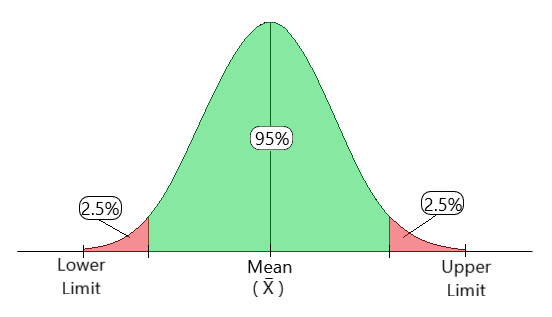

**Assumptions**:
1. The main Assumption to apply the z procedure is that the population std is known.
2. The samples collected should be representative of the complete population.
3. The population distribution should be normal or the sample size should be $\ge 30$ for the Central Limit Theorem to take effect.

The $Z_{\alpha/2}$ is called as the critical value and this value mainly governs the confidence level for which the confidence interval range is calculated. Whenever the confidence level value changes, it changes the Z critical value which results in change in the Margin of Error.    
**The Z critical value has in its boundary the area of distribution that equals to the confidence level used**

**The Standard Error which is the std of the sampling distribution of sample means tells the variability of the means calculated for different samples and how much closer or far away thay are from the true population mean. In other words, it tells how much precision there is in our estimation.**
1. Smaller Standard Error values results in smaller margin of error and it means that our estimates are precise.
1. Larger Standard Error values results in Larger margin of error and it means that our estimates have a lot of variation from the true population parameter.


In [9]:
# age population

pop_age = pop_df['Age']

In [10]:
# mean of the population

pop_mean = pop_age.mean()

In [11]:
# create 1000 samples from the population of age with sample size of 50

samples = []

no_of_samples = 1000

sample_size = 50

for i in range(no_of_samples):
    sample = pop_age.sample(n=sample_size,ignore_index=True).to_list()
    samples.append(sample)
    
# convert the samples to ndarray
samples = np.array(samples)

#shape of the samples
samples.shape

(1000, 50)

**We have created a sampling distribution and out of this lets create a sample distribution of sample means and calculate its mean and standard deviation**`

In [12]:
# create sampling distribution of sample means

sampling_dist_means  = np.mean(samples,axis=1)

sampling_dist_means.shape

(1000,)

In [13]:
# sampling distribution of samples std

sampling_dist_stds  = np.std(samples,axis=1,ddof=1)
sampling_dist_stds.shape

(1000,)

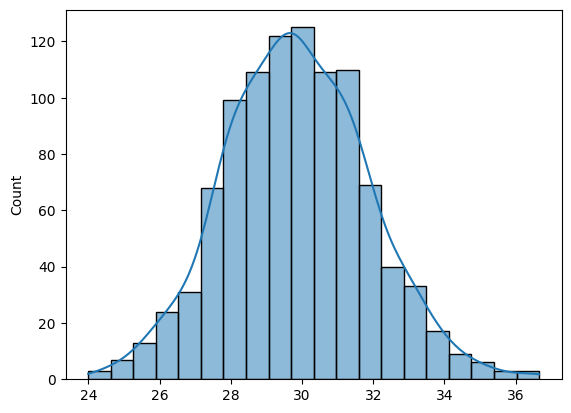

In [14]:
# plot the distribution and it should be a normal distribution 

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(sampling_dist_means,bins=20,kde=True)
plt.show()

**Distribution of sample means closely resembles the normal distribution due to the CLT(Central Limit Theorem)**

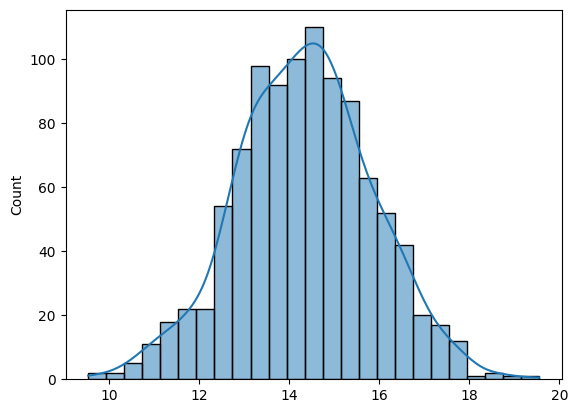

In [15]:
# plot the distribution and it should be a normal distribution 

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(sampling_dist_stds,bins=25,kde=True)
plt.show()

In [16]:
# mean and std of sample means

point_estimate = np.mean(sampling_dist_means)

print('The point estimate is',point_estimate)

standard_dev_means = np.std(sampling_dist_means,ddof=1)
print('The standard deviation is',standard_dev_means)

The point estimate is 29.850256200000004
The standard deviation is 2.01357708696904


In [17]:
# mean of sampling distribution sample stds

np.mean(sampling_dist_stds)

14.345047587010383

In [18]:
# population standard deviation

pop_std = pop_age.std()

pop_std

14.413493211271323

In [19]:
# check the accuracy of central limit theorem

print(f'Mean = {pop_mean:.2f}(pop), {point_estimate:.2f}(sampling_distribution)')
print(f'Std = {pop_std:.2f}(pop), {standard_dev_means*np.sqrt(sample_size):.2f}(sampling_distribution)')

Mean = 29.88(pop), 29.85(sampling_distribution)
Std = 14.41(pop), 14.24(sampling_distribution)


In [20]:
# standard error
standard_error = pop_std/np.sqrt(sample_size)

print(f'Standard Error = {standard_error}')

Standard Error = 2.0383757580552437


In [21]:
# calculate the Z critical value at alpha=0.05
from scipy.stats import norm

normal = norm()

Z_critical = norm.ppf(0.975)

# calculate the lower and the upper bounds

lower_bound = point_estimate - (Z_critical * standard_error)
upper_bound = point_estimate + (Z_critical * standard_error)

In [22]:
# print the confidence interval

print(f'The confidence interval is [{lower_bound:.2f}-{upper_bound:.2f}]')

The confidence interval is [25.86-33.85]


In [23]:
# print the popuilation mean
pop_mean

29.881137667304014

**The population mean lies within the confidence interval range**

## T procedure



$CI = \text{Point Estimate} \pm \text{Margin Of Error}$

$CI = \bar X \pm t_{\alpha/2} * \dfrac {s}{\sqrt {n}}$ with 95% confidence level

1. works well when the sample size is smaller than 30.
2. used when the population standard deviation is unknown.

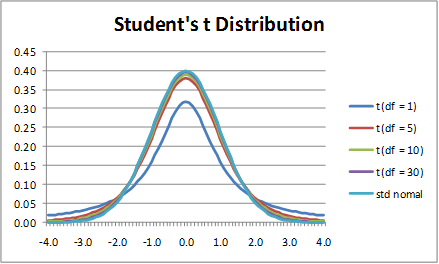

For smaller degrees of freedom the t distribution is different from standard normal distribution with fatter tails.   

For larger degrees of freedom the t distribution starts to resemble a lot like standard normal distribution because at larger sample sizes the precision of estimates from the sample represents very closely to the true parameter values and the variability of the sample estimates reduces.

In [24]:
# create 10000 samples from the population of age with sample size of 20
# more samples are created to get accurate estimation as the sample size is less

samples = []

no_of_samples = 10000

sample_size = 20

for i in range(no_of_samples):
    sample = pop_age.sample(n=sample_size,ignore_index=True).to_list()
    samples.append(sample)
    
# convert the samples to ndarray
samples = np.array(samples)

#shape of the samples
samples.shape

(10000, 20)

In [25]:
# create sampling distribution of sample means

sampling_dist_means  = np.mean(samples,axis=1)

sampling_dist_means.shape

(10000,)

In [26]:
# create sampling distribution of sample stds

sampling_dist_stds = np.std(samples,axis=1,ddof=1)

sampling_dist_stds.shape

(10000,)

In [27]:
# mean and std of sample means

point_estimate = np.mean(sampling_dist_means)

print('The point estimate is',point_estimate)

standard_dev_means = np.std(sampling_dist_means,ddof=1)
print('The standard deviation is',standard_dev_means)

The point estimate is 29.84886115
The standard deviation is 3.1826579287593613


In [28]:
# sample standard deviation

sample_std = np.mean(sampling_dist_stds)

sample_std

14.179852022216053

In [29]:
# standard error
standard_error = sample_std/np.sqrt(sample_size)

print(f'Standard Error = {standard_error}')

Standard Error = 3.170711303256295


**The standard error for t procedure is greater than the z procedure because**:-
1. The sample size is small.
2. Using sample std instead of population std increases the variability of the estimates that's why we use the longer confidence intervals for the t test.

In [30]:
sample_size

20

In [31]:
# calculate the Z critical value at alpha=0.05 and dof=19
from scipy.stats import t

t_dist= t(df=sample_size-1)

t_critical = t_dist.ppf(0.975)

# calculate the lower and the upper bounds

lower_bound = point_estimate - (t_critical * standard_error)
upper_bound = point_estimate + (t_critical * standard_error)

In [32]:
# print the confidence interval

print(f'The confidence interval is [{lower_bound:.2f}-{upper_bound:.2f}]')

The confidence interval is [23.21-36.49]


### For Z Procedure:

The confidence interval is:    
**[26.01-34.00]**

### For T procedure:
The confidence interval is:    
**[23.19-36.53]**

### Mean value of Polulation:
Mean = 29.88